## Machine_Learning_With_Python

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

* We are going to import the data with help of !wget and save it into csv file

In [115]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-04-09 20:50:48--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2020-04-09 20:50:48 (13.2 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [116]:
df = pd.read_csv('loan_train.csv')
df.head(5)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [117]:
df['Gender'].value_counts() ,  df['Principal'].value_counts()

(male      294
 female     52
 Name: Gender, dtype: int64, 1000    258
 800      81
 300       3
 500       2
 900       2
 Name: Principal, dtype: int64)

In [118]:
df.shape

(346, 10)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
Unnamed: 0        346 non-null int64
Unnamed: 0.1      346 non-null int64
loan_status       346 non-null object
Principal         346 non-null int64
terms             346 non-null int64
effective_date    346 non-null object
due_date          346 non-null object
age               346 non-null int64
education         346 non-null object
Gender            346 non-null object
dtypes: int64(5), object(5)
memory usage: 27.1+ KB


* As we can see that effective_date, due_date, education, and gender has object data.
* We are going to make dummy data set of education and after removing the column 'Mater or Above' then add it into our intial data set.

In [120]:
df = pd.concat([df,pd.get_dummies(df['education'])], axis=1)
df.drop(['Master or Above'], axis = 1,inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,Bechalor,High School or Below,college
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male,0,1,0
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female,1,0,0
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male,0,0,1
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female,0,0,1
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male,0,0,1


In [121]:
df['effective_date'] = pd.to_datetime(df['effective_date'])

df['effective_date_dayofweek'] = df['effective_date'].dt.dayofweek



* We are going to split our data set into two data set on the basis of gender. So, it will help in ploting the histogram and examine the data set.

In [122]:
select_Gender_Male = df.loc[df['Gender']=='male']
select_Gender_Female = df.loc[df['Gender']=='female']

In [123]:
select_Gender_Male['Principal'].value_counts() ,select_Gender_Female['Principal'].value_counts()

(1000    220
 800      69
 300       3
 500       1
 900       1
 Name: Principal, dtype: int64, 1000    38
 800     12
 500      1
 900      1
 Name: Principal, dtype: int64)

* Once again we are going to split the data set on the basis of loan status.

In [124]:
select_Gender_Male_paidoff =select_Gender_Male.loc[select_Gender_Male['loan_status']=='PAIDOFF']

select_Gender_Female_paidoff =select_Gender_Female.loc[select_Gender_Female['loan_status']=='PAIDOFF']

select_Gender_Male_collection =select_Gender_Male.loc[select_Gender_Male['loan_status']=='COLLECTION']

select_Gender_Female_collection =select_Gender_Female.loc[select_Gender_Female['loan_status']=='COLLECTION']

select_Gender_Male_collection[0:4]

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,Bechalor,High School or Below,college,effective_date_dayofweek
260,300,300,COLLECTION,1000,15,2016-09-09,9/23/2016,29,college,male,0,0,1,4
261,301,301,COLLECTION,1000,30,2016-09-09,10/8/2016,37,High School or Below,male,0,1,0,4
262,303,303,COLLECTION,800,15,2016-09-09,9/23/2016,27,college,male,0,0,1,4
263,304,304,COLLECTION,800,15,2016-09-09,9/23/2016,24,Bechalor,male,1,0,0,4


In [125]:
# Plotting of data set on basis of different 

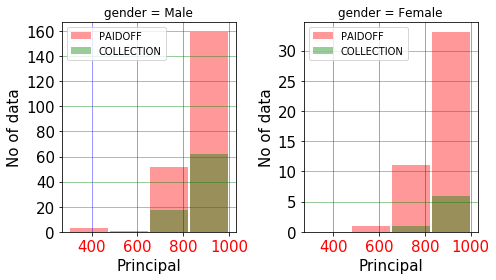

In [126]:
bin= np.linspace(df['Principal'].min(),df['Principal'].max(),5)
plt.figure(figsize=[7,4])
plt.subplot(1,2,1)
plt.hist([select_Gender_Male_paidoff['Principal']],bins=bin,rwidth=0.95,color=['r'],alpha=0.4,label=['PAIDOFF'])
plt.hist([select_Gender_Male_collection['Principal']],bins=bin,rwidth=0.95,color=['g'],alpha=0.4,label=['COLLECTION'])
plt.title('gender = Male')
plt.legend()
plt.grid(axis='y',color='g', alpha=0.5)
plt.grid(axis='x',color='b', alpha=0.5)
plt.xticks(color='r',fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Principal',fontsize=15)
plt.ylabel('No of data',fontsize=15)

plt.subplot(1,2,2)
plt.hist([select_Gender_Female_paidoff['Principal']],bins=bin,rwidth=0.95,color=['r'],alpha=0.4,label=['PAIDOFF'])
plt.hist([select_Gender_Female_collection['Principal']],bins=bin,rwidth=0.95,color=['g'],alpha=0.4,label=['COLLECTION'])
plt.title('gender = Female')
plt.grid(axis='y',color='g', alpha=0.5)
plt.grid(axis='x',color='b', alpha=0.5)
plt.xticks(color='r',fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Principal',fontsize=15)
plt.ylabel('No of data',fontsize=15)
plt.legend()
plt.plot()
plt.tight_layout()

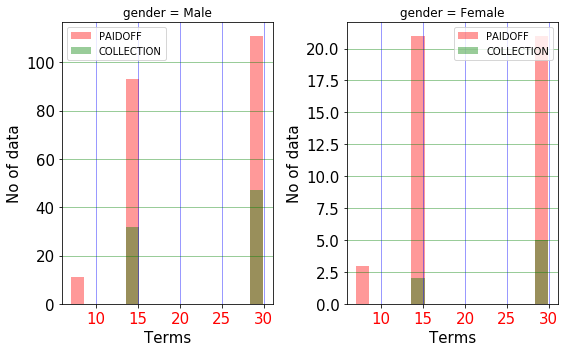

In [127]:
bin= np.linspace(df['terms'].min(),df['terms'].max(),15)

plt.figure(figsize=[8,5])
plt.subplot(1,2,1)
plt.hist([select_Gender_Male_paidoff['terms']],bins=bin,rwidth=0.95,color=['r'],alpha=0.4,label=['PAIDOFF'])
plt.hist([select_Gender_Male_collection['terms']],bins=bin,rwidth=0.95,color=['g'],alpha=0.4,label=['COLLECTION'])
plt.title('gender = Male')
plt.legend()
plt.grid(axis='y',color='g', alpha=0.5)
plt.grid(axis='x',color='b', alpha=0.5)
plt.xticks(color='r',fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Terms',fontsize=15)
plt.ylabel('No of data',fontsize=15)

plt.subplot(1,2,2)
plt.hist([select_Gender_Female_paidoff['terms']],bins=bin,rwidth=0.95,color=['r'],alpha=0.4,label=['PAIDOFF'])
plt.hist([select_Gender_Female_collection['terms']],bins=bin,rwidth=0.95,color=['g'],alpha=0.4,label=['COLLECTION'])
plt.title('gender = Female')
plt.grid(axis='y',color='g', alpha=0.5)
plt.grid(axis='x',color='b', alpha=0.5)
plt.xticks(color='r',fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Terms',fontsize=15)
plt.ylabel('No of data',fontsize=15)
plt.legend()
plt.plot()
plt.tight_layout()

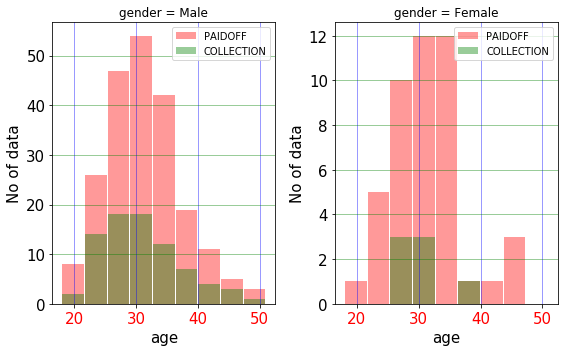

In [128]:
bin= np.linspace(df['age'].min(),df['age'].max(),10)

plt.figure(figsize=[8,5])
plt.subplot(1,2,1)
plt.hist([select_Gender_Male_paidoff['age']],bins=bin,rwidth=0.95,color=['r'],alpha=0.4,label=['PAIDOFF'])
plt.hist([select_Gender_Male_collection['age']],bins=bin,rwidth=0.95,color=['g'],alpha=0.4,label=['COLLECTION'])
plt.title('gender = Male')
plt.legend()
plt.grid(axis='y',color='g', alpha=0.5)
plt.grid(axis='x',color='b', alpha=0.5)
plt.xticks(color='r',fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('age',fontsize=15)
plt.ylabel('No of data',fontsize=15)

plt.subplot(1,2,2)
plt.hist([select_Gender_Female_paidoff['age']],bins=bin,rwidth=0.95,color=['r'],alpha=0.4,label=['PAIDOFF'])
plt.hist([select_Gender_Female_collection['age']],bins=bin,rwidth=0.95,color=['g'],alpha=0.4,label=['COLLECTION'])
plt.title('gender = Female')
plt.grid(axis='y',color='g', alpha=0.5)
plt.grid(axis='x',color='b', alpha=0.5)
plt.xticks(color='r',fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('age',fontsize=15)
plt.ylabel('No of data',fontsize=15)
plt.legend()
plt.plot()
plt.tight_layout()

In [129]:
df['weekend'] = df['effective_date_dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,Bechalor,High School or Below,college,effective_date_dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,10/7/2016,45,High School or Below,male,0,1,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,10/7/2016,33,Bechalor,female,1,0,0,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,9/22/2016,27,college,male,0,0,1,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,10/8/2016,28,college,female,0,0,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,10/8/2016,29,college,male,0,0,1,4,1


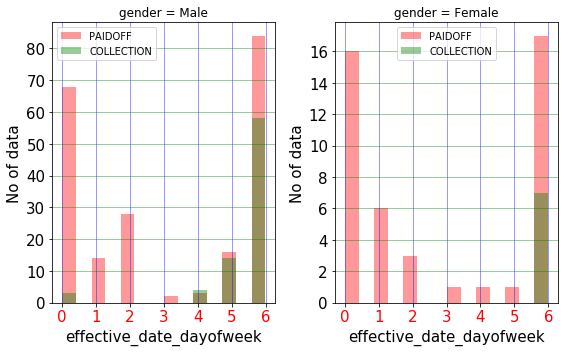

In [130]:
bin = np.linspace(df['effective_date_dayofweek'].min(), df['effective_date_dayofweek'].max(), 15)


plt.figure(figsize=[8,5])
plt.subplot(1,2,1)
plt.hist([select_Gender_Male_paidoff['effective_date_dayofweek']],bins=bin,rwidth=0.95,color=['r'],alpha=0.4,label=['PAIDOFF'])
plt.hist([select_Gender_Male_collection['effective_date_dayofweek']],bins=bin,rwidth=0.95,color=['g'],alpha=0.4,label=['COLLECTION'])
plt.title('gender = Male')
plt.legend()
plt.grid(axis='y',color='g', alpha=0.5)
plt.grid(axis='x',color='b', alpha=0.5)
plt.xticks(color='r',fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('effective_date_dayofweek',fontsize=15)
plt.ylabel('No of data',fontsize=15)

plt.subplot(1,2,2)
plt.hist([select_Gender_Female_paidoff['effective_date_dayofweek']],bins=bin,rwidth=0.95,color=['r'],alpha=0.4,label=['PAIDOFF'])
plt.hist([select_Gender_Female_collection['effective_date_dayofweek']],bins=bin,rwidth=0.95,color=['g'],alpha=0.4,label=['COLLECTION'])
plt.title('gender = Female')
plt.grid(axis='y',color='g', alpha=0.5)
plt.grid(axis='x',color='b', alpha=0.5)
plt.xticks(color='r',fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('effective_date_dayofweek',fontsize=15)
plt.ylabel('No of data',fontsize=15)
plt.legend()
plt.plot()
plt.tight_layout()


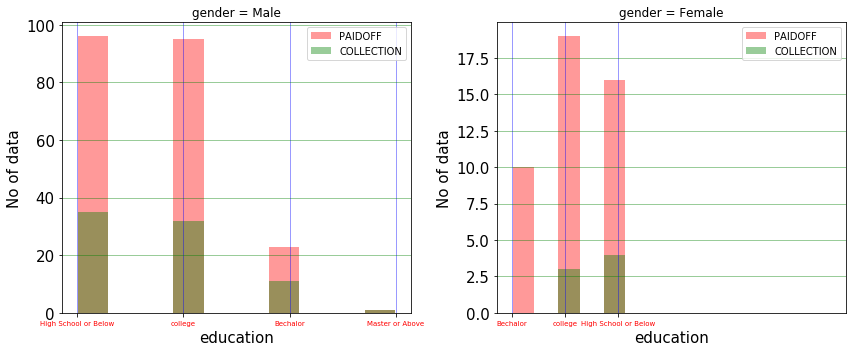

In [131]:
plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
plt.hist([select_Gender_Male_paidoff['education']],bins=10,rwidth=0.95,color=['r'],alpha=0.4,label=['PAIDOFF'])
plt.hist([select_Gender_Male_collection['education']],bins=10,rwidth=0.95,color=['g'],alpha=0.4,label=['COLLECTION'])
plt.title('gender = Male')
plt.legend()
plt.grid(axis='y',color='g', alpha=0.5)
plt.grid(axis='x',color='b', alpha=0.5)
plt.xticks(color='r',fontsize=7)
plt.yticks(fontsize=15)
plt.xlabel('education',fontsize=15)
plt.ylabel('No of data',fontsize=15)

plt.subplot(1,2,2)
plt.hist([select_Gender_Female_paidoff['education']],bins=bin,rwidth=0.95,color=['r'],alpha=0.4,label=['PAIDOFF'])
plt.hist([select_Gender_Female_collection['education']],bins=bin,rwidth=0.95,color=['g'],alpha=0.4,label=['COLLECTION'])
plt.title('gender = Female')
plt.grid(axis='y',color='g', alpha=0.5)
plt.grid(axis='x',color='b', alpha=0.5)
plt.xticks(color='r',fontsize=7)
plt.yticks(fontsize=15)
plt.xlabel('education',fontsize=15)
plt.ylabel('No of data',fontsize=15)
plt.legend()
plt.plot()
plt.tight_layout()

* We are ging to assign the numeric value to gender column.

In [132]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)


In [133]:
Feature= df[['Principal','terms','age','Gender','weekend','Bechalor','High School or Below','college']]
X = Feature
X.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [134]:
y=df[['loan_status']].values
y[0:5]

array([['PAIDOFF'],
       ['PAIDOFF'],
       ['PAIDOFF'],
       ['PAIDOFF'],
       ['PAIDOFF']], dtype=object)

# Preprocessing the data

In [135]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Spliting the data into train and test data set.

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size= 0.2)
print('train model: ',X_train.shape,y_train.shape)
print('test model: ',X_test.shape,y_test.shape)

train model:  (276, 8) (276, 1)
test model:  (70, 8) (70, 1)


# K_Nearest_Neighbors

In [137]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In [138]:
ks =10
mean_acc = np.zeros(ks-1)
std_acc = np.zeros(ks-1)
for i in range(1,ks):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test,yhat)
    std_acc[i-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/_

array([0.6       , 0.55714286, 0.67142857, 0.68571429, 0.75714286,
       0.7       , 0.72857143, 0.64285714, 0.68571429])

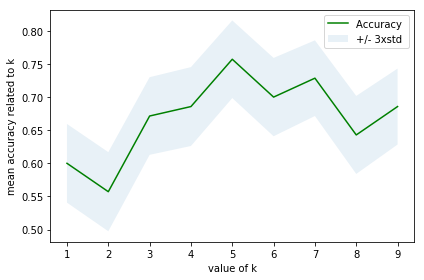

In [139]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha = 0.1 )
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.xlabel('value of k')
plt.ylabel('mean accuracy related to k')
plt.tight_layout()

In [140]:
print('maximum accuracy is  ',mean_acc.max(),'for value of k is  ',mean_acc.argmax()+1)


maximum accuracy is   0.7571428571428571 for value of k is   5


# Decision_Tree

In [141]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
import matplotlib.image as mpimg
from sklearn import tree

#Modelling
modeltree = DecisionTreeClassifier(criterion="entropy")
modeltree.fit(X_train, y_train)

#Prediction
predTree = modeltree.predict(X_test)
print(predTree[0:5])
print(y_test[0:5])

names = Feature.columns

['COLLECTION' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF']
[['PAIDOFF']
 ['COLLECTION']
 ['COLLECTION']
 ['PAIDOFF']
 ['COLLECTION']]


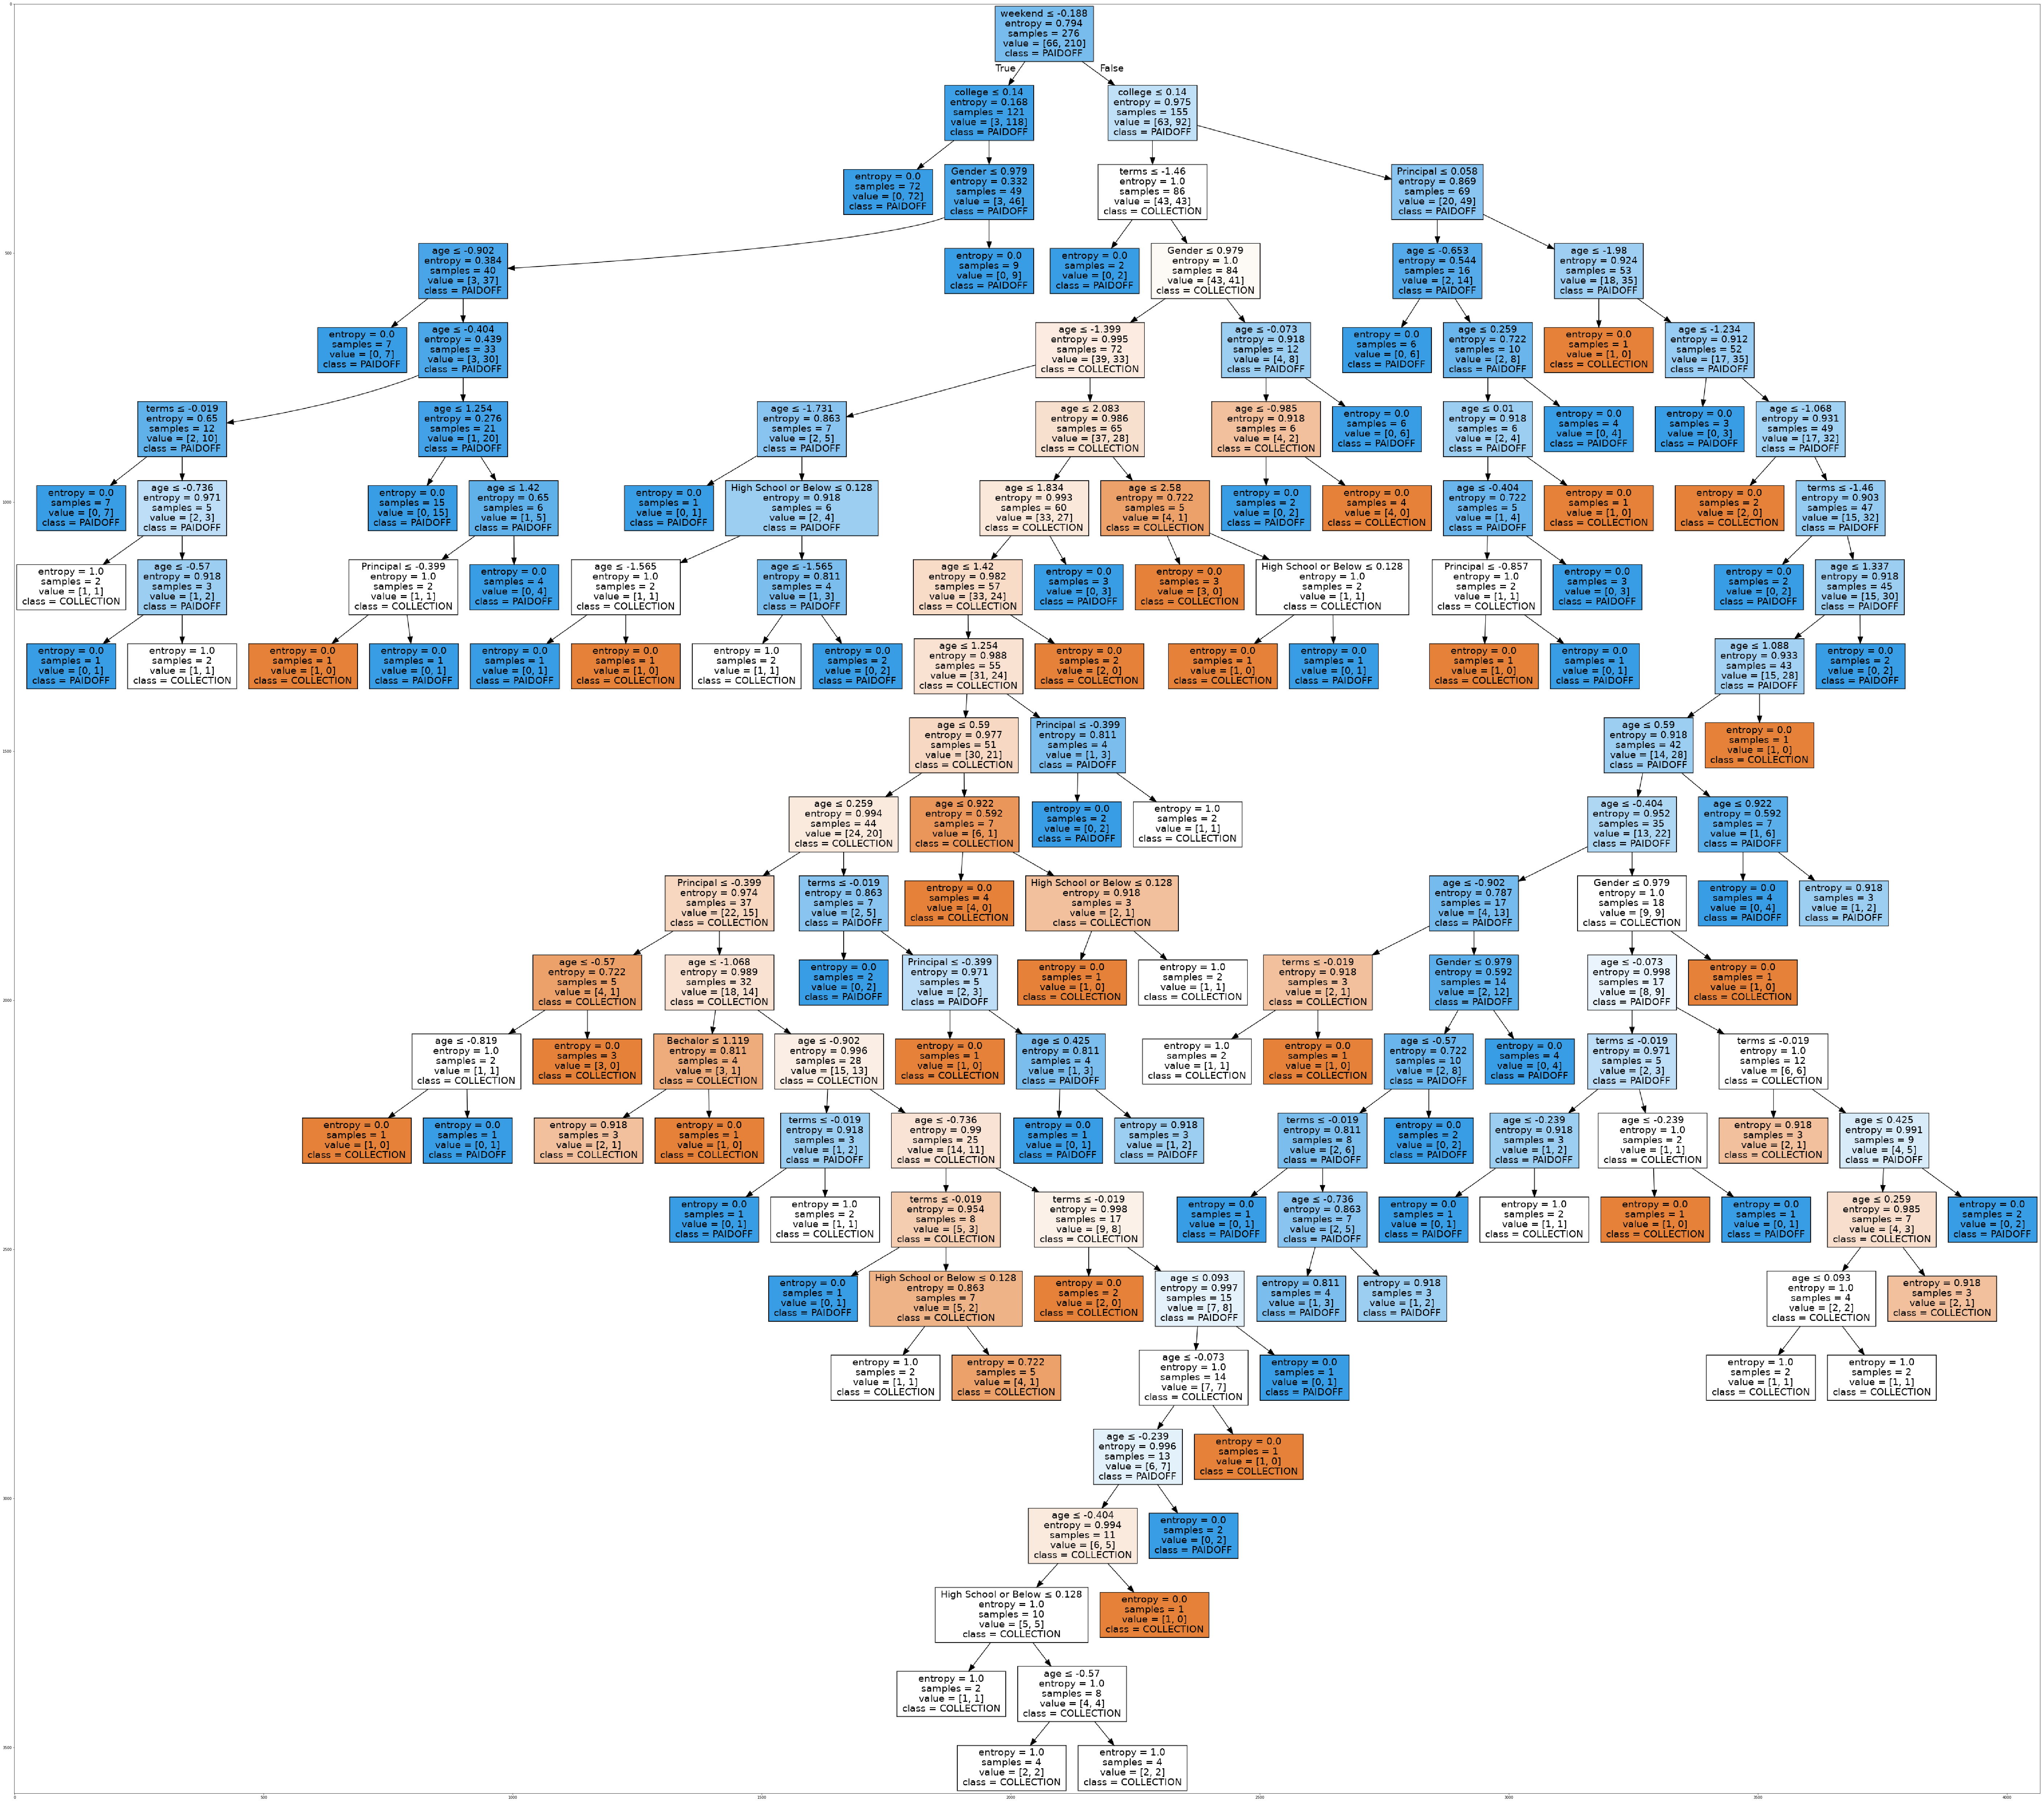

In [142]:
!pip install graphviz
!pip install pydotplus
import graphviz 
import pydotplus

dot_data = StringIO()
filename = "tree.png"
featureNames = Feature.columns
out=tree.export_graphviz(modeltree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

# Support_Vector_Machine

In [143]:
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn import svm

#Modelling
clf = svm.SVC(kernel="sigmoid")
clf.fit(X_train, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [144]:
yhat = clf.predict(X_test)

In [145]:
from sklearn.metrics import f1_score
f1_score(y_test,yhat, average="weighted")

0.6258503401360546

# Logistic_Regression

In [146]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver="liblinear").fit(X_train,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [147]:

yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

In [148]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test,yhat)

0.6428571428571429

## Load_set_for_evolution

In [149]:
#!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

In [150]:
# test_df = pd.read_csv('loan_test.csv')
# test_df.head()

In [151]:
# # convert date time
# test_df['due_date'] = pd.to_datetime(test_df['due_date'])
# test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
# test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
# # evaulate weekend field
# test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
# # work out education level
# test_feature = test_df[['Principal','terms','age','weekend']]
# test_feature = pd.concat([test_feature,pd.get_dummies(test_df['education'])], axis=1)
# test_feature.drop(['Master or Above'], axis = 1,inplace=True)
# test_feature.head()



In [152]:
# # normalize the test data
# test_X = preprocessing.StandardScaler().fit(test_feature).transform(test_feature)
# test_X[0:5]

In [153]:
# # and target result
# test_y = test_df['loan_status'].values
# test_y[0:10]

In [154]:
# # normalize the test data
# TestX = preprocessing.StandardScaler().fit(test_feature).transform(test_feature)
# TestX[0:5]


In [155]:
# and target result
# TestY = test_df['loan_status'].values
# TestY[0:5]

In [156]:
knn_pred=neigh.predict(TestX)
jc1=jaccard_similarity_score(TestY, knn_pred)
fs1=f1_score(TestY, knn_pred, average='weighted')

tree_pred=modeltree.predict(TestX)
jc2=jaccard_similarity_score(TestY, tree_pred)
fs2=f1_score(TestY, tree_pred, average='weighted')

svm_pred=clf.predict(TestX)
jc3=jaccard_similarity_score(TestY, svm_pred)
fs3=f1_score(TestY, svm_pred, average='weighted')

log_pred=LR.predict(TestX)
proba=LR.predict_proba(TestX)
jc4=jaccard_similarity_score(TestY, log_pred)
fs4=f1_score(TestY, log_pred, average='weighted')  
ll4=log_loss(TestY, proba)

list_jc = [jc1, jc2, jc3, jc4]
list_fs = [fs1, fs2, fs3, fs4]
list_ll = ['NA', 'NA', 'NA', ll4]


import pandas as pd

# fomulate the report format
df = pd.DataFrame(list_jc, index=['KNN','Decision Tree','SVM','Logistic Regression'])
df.columns = ['Jaccard']
df.insert(loc=1, column='F1-score', value=list_fs)
df.insert(loc=2, column='LogLoss', value=list_ll)
df.columns.name = 'Algorithm'
df

ValueError: query data dimension must match training data dimension